In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
data = pd.read_excel('all-us-tropical-storms-noaa.xls')
data

,Storm #,Date,Time,Lat,Lon,Max,Landfall,Storm
0,NaN,NaN,NaN,NaN,NaN,Winds,State,Names
1,NaN,NaN,NaN,NaN,NaN,(kt),NaN,NaN
2,1850s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,10/19/1851,1500Z,41.1N,71.7W,50,NY,NaN
4,1852,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
425,5,2021-09-07 00:00:00,1630Z,41.4,71.7,50,RI,Elsa
426,6,08/16/2021,1900Z,2022-07-29 00:00:00,85.4,55,FL,Fred
427,8,08/22/2021,1520Z,41.2,71.6,55,RI,Henri
428,8,08/22/2021,1615Z,41.3,71.8,55,RI,Henri


In [4]:
data = data[(data.Date.str.contains("None")) == False] #rows representing years without events should, again, be removed:

In [ ]:
#if needed clean the Date of additional symbols

#data['Date'] = data.Date.str.replace('\$', '')
#data['Date'] = data.Date.str.replace('\*', '')
#data['Date'] = data.Date.str.replace('\#', '')
#data['Date'] = data.Date.str.replace('\%', '')
#data['Date'] = data.Date.str.replace('\&', '')

In [9]:
data.columns =['Storm#', 'Date', 'Time', 'Lat', 'Lon', 
             'MaxWinds', 'LandfallState', 'StormName'] #rename column names

In [ ]:
#data['Date'] = pd.to_datetime(data['Date']) #cast date time type to date column

In [13]:
df1 = data[['Date','MaxWinds']] #create new df containing MaxWinds and Date

<AxesSubplot:>

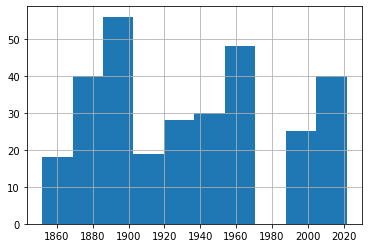

In [16]:
df1['Date'].hist() #no upward trend

In [17]:
print(df1.shape) #number of rows and columns

(304, 2)


In [18]:
df1 #

,Date,MaxWinds
3,1851-10-19,50
8,1856-08-19,50
9,1857-09-30,50
10,1858-09-14,60
11,1858-09-16,50
...,...,...
421,2021-06-19,40
422,2021-06-28,35
426,2021-08-16,55
427,2021-08-22,55


In [19]:
#divide data based on the wind speed into new data frames
df_30 = df1[df1['MaxWinds'].between(30, 39)]
df_40 = df1[df1['MaxWinds'].between(40, 49)]
df_50 = df1[df1['MaxWinds'].between(50, 59)]
df_60 = df1[df1['MaxWinds'].between(60, 79)]

In [20]:
#check the number of rows per each data set
st1 = len(df_30.index)
print('The number of storms between 30 and 39: ', st1)
st2 = len(df_40.index)
print('The number of storms between 40 and 49: ', st2)
st3 = len(df_50.index)
print('The number of storms between 50 and 59: ', st3)
st4 = len(df_60.index)
print('The number of storms between 60 and 79: ', st4)

The number of storms between 30 and 39:  43
The number of storms between 40 and 49:  91
The number of storms between 50 and 59:  119
The number of storms between 60 and 79:  51


In [21]:
#check subcategories
df_40['MaxWinds'].value_counts()

40    61
45    30
Name: MaxWinds, dtype: int64

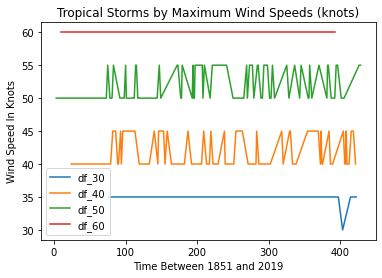

In [27]:
#plot alltogether

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
df_30['MaxWinds'].plot(ax=ax, label='df_30')
df_40['MaxWinds'].plot(ax=ax, label='df_40')
df_50['MaxWinds'].plot(ax=ax, label='df_50')
df_60['MaxWinds'].plot(ax=ax, label='df_60')
ax.set_ylabel('Wind Speed In Knots')
ax.set_xlabel('Time Between 1851 and 2019')
plt.title('Tropical Storms by Maximum Wind Speeds (knots)')
ax.legend(loc='lower left')

<AxesSubplot:>

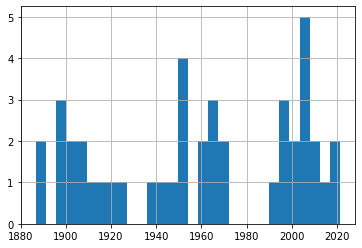

In [31]:
df_30['Date'].hist(bins=30)

<AxesSubplot:>

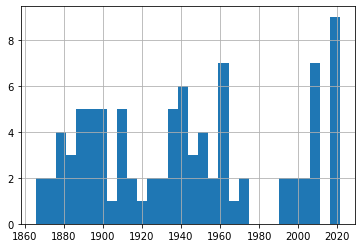

In [32]:
df_40['Date'].hist(bins=30)

<AxesSubplot:>

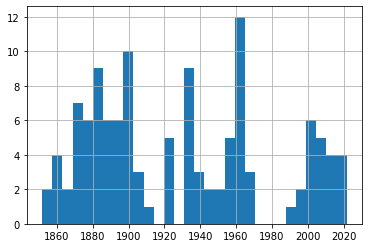

In [33]:
df_50['Date'].hist(bins=30)

<AxesSubplot:>

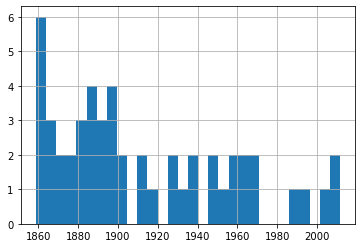

In [34]:
df_60['Date'].hist(bins=30)